# WeRateDogs Project - Wrangle and Analyze Data

##### By Yan Lu

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one & visualization](#one)
   - [Insight two & visualization](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)

<a id='intro'></a>
## Introduction

The purpose of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations by applying the knowledge we've learned from Udacity Data Analysis Nanodegree program. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

<a id='gather'></a>
## Gathering data

1. **Twitter archive file:** The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. It can be downloaded from the Udacity course page.

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**1. Twitter archive file**

In [61]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import re
import tweepy 
import json
from scipy import stats

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [3]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [14]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# authentication pieces
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

**3. Twitter API & JSON**


In [16]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 589
Rate limit reached. Sleeping for: 686


In [17]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2337
The list of tweets no found 19


In [18]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [19]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [20]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [21]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37727,8223,7894158,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32406,6079,7894158,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24406,4023,7894158,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41052,8369,7894158,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39243,9081,7894158,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [23]:
tweet_json.to_csv('tweet_json.csv')

In [4]:
tweet_json = pd.read_csv('tweet_json.csv')

<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [24]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37727,8223,7894158,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32406,6079,7894158,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24406,4023,7894158,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41052,8369,7894158,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39243,9081,7894158,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19734,3008,7894158,12,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11539,1991,7894158,12,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,63638,18275,7894158,12,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27113,4137,7894157,12,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31105,7144,7894157,12,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

In [27]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
twitter_archive.source.values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [30]:
twitter_archive.expanded_urls.values

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [31]:
with pd.option_context('max_colwidth', -1):
    display(twitter_archive[['tweet_id','text','expanded_urls']])

,tweet_id,text,expanded_urls
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1"
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1"
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1


In [32]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [33]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [34]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
an                7
Toby              7
Daisy             7
Bailey            7
Oscar             6
Scout             6
Rusty             6
Jax               6
Stanley           6
Milo              6
Jack              6
Dave              6
Koda              6
Bella             6
Leo               6
Larry             5
               ... 
Berkeley          1
Sweet             1
Sprout            1
Dixie             1
Ralpher           1
Lambeau           1
Bobbay            1
Jonah             1
Dex               1
Grizz             1
Kulet             1
Newt              1
Cedrick           1
Bayley            1
Pubert            1
Eleanor           1
Moofasa           1
Winifred          1
Jennifur          1


In [35]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [36]:
# print the rows with rating_numerator values above 100
print(twitter_archive.loc[twitter_archive.rating_numerator == 420, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 165, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 182, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 960, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1776, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 121, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text'])

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [37]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][188]) # Reply - it will be deleted programmatically when delete all replies
print(twitter_archive['text'][2074]) # This is not really about dogs. Will be dropped when cleaning.
print(twitter_archive['text'][902]) # There are actually 15 dogs.
print(twitter_archive['text'][1779]) # There are actually 12 dogs.
print(twitter_archive['text'][290]) # Reply - it will be deleted programmatically when delete all replies
print(twitter_archive['text'][1634]) # There are actually 13 dogs.
print(twitter_archive['text'][189]) # Reply - it will be deleted programmatically when delete all replies
print(twitter_archive['text'][313]) # Reply - it will be deleted programmatically when delete all replies
print(twitter_archive['text'][979]) # 1776 is just the year of independence, not a real rating, will be removed.
print(twitter_archive['text'][1635]) # Same picture as index 1634, duplicated, will be removed.
print(twitter_archive['text'][1120]) # 17 dogs.

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@markhoppus 182/10
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to 

In [38]:
# Find out the 'tweet_id' values of these entries
print(twitter_archive['tweet_id'][188]) # Retweet - it will be deleted when delete all retweets
print(twitter_archive['tweet_id'][2074]) # This is not really about dogs. Will be dropped when cleaning.
print(twitter_archive['tweet_id'][902]) # There are actually 15 dogs.
print(twitter_archive['tweet_id'][1779]) # There are actually 12 dogs.
print(twitter_archive['tweet_id'][290]) # Retweet - it will be deleted when delete all retweets
print(twitter_archive['tweet_id'][1634]) # There are actually 13 dogs.
print(twitter_archive['tweet_id'][189]) # Retweet - it will be deleted when delete all retweets
print(twitter_archive['tweet_id'][313]) # Retweet - it will be deleted when delete all retweets
print(twitter_archive['tweet_id'][979]) # 1776 is just the year of independence, not a real rating, will be removed.
print(twitter_archive['tweet_id'][1635]) # Same picture as index 1634, duplicated, will be removed.
print(twitter_archive['tweet_id'][1120]) # 17 dogs.

855862651834028034
670842764863651840
758467244762497024
677716515794329600
838150277551247360
684225744407494656
855860136149123072
835246439529840640
749981277374128128
684222868335505415
731156023742988288


In [39]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [40]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 50, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 80, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 20, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 40, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 70, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 90, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: t

In [41]:
print(twitter_archive['text'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][1202]) #actual rating 11/10 need to change manually
print(twitter_archive['text'][1274]) # 5 dogs
print(twitter_archive['text'][1351]) # 5 dogs
print(twitter_archive['text'][1254]) # 8 dogs
print(twitter_archive['text'][1843]) # 8 dogs
print(twitter_archive['text'][1165]) # actual rating 13/10 need to change manually
print(twitter_archive['text'][1598]) # tweet to explain rating -delete
print(twitter_archive['text'][2335]) # actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating -delete
print(twitter_archive['text'][1433]) # 4 dogs
print(twitter_archive['text'][433]) # 7 dogs
print(twitter_archive['text'][342]) # Retweet and no rating - delete
print(twitter_archive['text'][1228]) # 9 dogs
print(twitter_archive['text'][516]) # no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Happy 4/20 from

In [42]:
print(twitter_archive['tweet_id'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['tweet_id'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['tweet_id'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['tweet_id'][1202]) #actual rating 11/10 need to change manually
print(twitter_archive['tweet_id'][1274]) # 5 dogs
print(twitter_archive['tweet_id'][1351]) # 5 dogs
print(twitter_archive['tweet_id'][1254]) # 8 dogs
print(twitter_archive['tweet_id'][1843]) # 8 dogs
print(twitter_archive['tweet_id'][1165]) # actual rating 13/10 need to change manually
print(twitter_archive['tweet_id'][1598]) # tweet to explain rating -delete
print(twitter_archive['tweet_id'][2335]) # actual rating 9/10 need to change manually
print(twitter_archive['tweet_id'][1663]) # tweet to explain rating -delete
print(twitter_archive['tweet_id'][1433]) # 4 dogs
print(twitter_archive['tweet_id'][433]) # 7 dogs
print(twitter_archive['tweet_id'][342]) # Retweet and no rating - delete
print(twitter_archive['tweet_id'][1228]) # 9 dogs
print(twitter_archive['tweet_id'][516]) # no rating - delete

775096608509886464
740373189193256964
682962037429899265
716439118184652801
709198395643068416
704054845121142784
710658690886586372
675853064436391936
722974582966214656
686035780142297088
666287406224695296
682808988178739200
697463031882764288
820690176645140481
832088576586297345
713900603437621249
810984652412424192


In [43]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [44]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
sum(image_prediction.tweet_id.duplicated())

0

In [46]:
sum(image_prediction.jpg_url.duplicated())

66

In [47]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [48]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37727,8223,7894158,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32406,6079,7894158,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24406,4023,7894158,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,41052,8369,7894158,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39243,9081,7894158,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [49]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [50]:
tweet_json.retweeted_status.value_counts()

Original tweet       2170
This is a retweet     167
Name: retweeted_status, dtype: int64

<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### *twitter_archive*
1. Some values of column `name` is not actual names but pronouns such as a/an/the.
2. Some entries are retweets.
3. Some entries are replies.
4. Some columns are useless, especially those retweet-related (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`).
5. Some `expanded_urls` are missing.
6. Datatype of `timestamp` is wrong.
7. Some `rating_numerator` and `rating_denominator` are decimals. (pointed out by reviewer)
8. Incorrect `rating_numerator` and `rating_denominator` values.
9. Some entries should be classified as `pupper`, `doggo`, `floofer` and `puppo` (missing data).


### *image_prediction*
1. Values in p1, p2, p3 have inconsistent capitalization
2. Duplicated jpg_url values 
3. Create 1 column for image prediction and 1 column for confidence level
4. Some columns are useless for analysis 

### *tweet_json*
1. Some entries are retweets

<a id='Tidiness'></a>
### Tidiness

1. Erroneous datatypes in twitter_archive dataframe (`doggo`, `floofer`, `pupper`, and `puppo` columns).
2. Three dataframes should be combined into one using tweet_id as the key

<a id='clean'></a>
## Cleaning Data

In [74]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

**Twitter archive** - 1. Some values of column `name` is not actual names but pronouns such as a/an/the.

#### Define

Set "a/an/the" to "None" if no name given otherwise fix name.

#### Code

In [75]:
def replace_names(row):
    # Only try to replace name if it is 'a'
    if (row['name'] == 'a') or (row['name'] == 'an') or (row['name'] == 'the'):    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

twitter_archive_clean = twitter_archive_clean.apply(replace_names, axis=1)

#### Test

In [76]:
# Check if there is no 'a' names
'a' in twitter_archive_clean['name']

False

In [77]:
# Check if there is no 'an' names
'an' in twitter_archive_clean['name']

False

In [78]:
# Check if there is no 'the' names
'the' in twitter_archive_clean['name']

False

**Twitter archive** - 2. Some entries are retweets.

#### Define

Delete retweets by filtering the NaN of `retweeted_status_user_id`

#### Code

In [79]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [80]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


**Twitter archive** - 3. Some entries are replies. 

#### Define

Find entries that are replies by matching text pattern '@...' and drop entries from the table

#### Code

In [81]:
# Find all the replies 
retweets = twitter_archive_clean.text.str.match('@')

# Only keep the tweets that aren't replies
twitter_archive_clean = twitter_archive_clean[~retweets]

#### Test

In [82]:
# Test that we have no replies
retweets = twitter_archive_clean.text.str.match('^RT @')
twitter_archive_clean[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Twitter archive** - 4. Some columns are useless, especially those retweet-related (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`).

#### Define

Drop useless columns

#### Code

In [83]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp'], 1)


#### Test

In [84]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Twitter archive** - 5. Some `expanded_urls` are missing.

#### Define

Use `tweet_id` to get `expanded_urls`, ended with '/photo/1'

#### Code

In [85]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
twitter_archive_clean = twitter_archive_clean.apply(add_urls, axis=1)

#### Test

In [86]:
# Check if there is any empty expanded_urls
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Twitter archive** - 6. Datatype of `timestamp` is wrong.

#### Define

Change timestamp to datetimes

#### Code

In [87]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [88]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2152 non-null int64
timestamp             2152 non-null datetime64[ns]
text                  2152 non-null object
expanded_urls         2152 non-null object
rating_numerator      2152 non-null int64
rating_denominator    2152 non-null int64
name                  2152 non-null object
doggo                 2152 non-null object
floofer               2152 non-null object
pupper                2152 non-null object
puppo                 2152 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 201.8+ KB


**Twitter archive** - 7. Some `rating_numerator` and `rating_denominator` are decimals.

#### Define
First change the data type of numerators and denominators from int to float to allow decimals. 

In [89]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [90]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

Then, get the decimal ratings by matching the text pattern "#.#/#.#" and save as new rating.

#### Code

In [91]:
# Apply function to redo rating to capture decimal numerators and denominators

def get_decimal_rating(row):
    #if text matches for numerator or denominator, change it
    decimal_rating_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_rating_pattern, row['text'])
    if matches != None:
        row['rating_numerator'] = matches.group(1)
        row['rating_denominator'] = matches.group(2)


    return row
    

    
twitter_archive_clean = twitter_archive_clean.apply(get_decimal_rating, axis=1)    

#### Test

In [92]:
def show_decimal_rating(row):
    #if text matches for numerator or denominator, print it
    decimal_rating_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_rating_pattern, row['text'])
    if matches != None:
        print(row['rating_numerator'], row['rating_denominator'])
        print(row['text'])

    return row
    
twitter_archive_clean.apply(show_decimal_rating, axis=1)

13.5 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
9.75 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
11.27 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
9.5 10
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
11.26 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Twitter archive** - 8. Incorrect `rating_numerator` and `rating_denominator` values.

#### *a. Manually*
The entries with the numerators values bigger than 100 are checked. The irrelevant entries will be removed.

#### Code

In [93]:
# remove irrelevant entries
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 670842764863651840]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 749981277374128128]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 684222868335505415]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]

In [94]:
# Mannually correct the numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10


#### *b. Programatically* 
Some tweets with numerators extradinary high are for multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1. 

#### Code & Test

In [95]:
problematic_entries_id = [758467244762497024, 677716515794329600, 684225744407494656, 
                          731156023742988288, 709198395643068416, 704054845121142784,
                          710658690886586372, 675853064436391936, 697463031882764288,
                          820690176645140481, 713900603437621249]
for id in problematic_entries_id:
    twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_numerator'] = 10 * twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_numerator'] / twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_denominator']
    twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_denominator'] = 10
    print(id,twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'text'],twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_numerator'],twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == id), 'rating_denominator'])

758467244762497024 902    Why does this never happen at my front door......
Name: text, dtype: object 902    11
Name: rating_numerator, dtype: object 902    10
Name: rating_denominator, dtype: object
677716515794329600 1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object 1779    12
Name: rating_numerator, dtype: object 1779    10
Name: rating_denominator, dtype: object
684225744407494656 1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object 1634    11
Name: rating_numerator, dtype: object 1634    10
Name: rating_denominator, dtype: object
731156023742988288 1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object 1120    12
Name: rating_numerator, dtype: object 1120    10
Name: rating_denominator, dtype: object
709198395643068416 1274    From left to right:\nCletus, Jerome, Alejandro...
Name: text, dtype: object 1274    9
Name: rating_numerator, dtype: object 1274    10
Name: rating_denominator, dty

**Twitter archive** - 9. Some entries should be classified as `pupper`, `doggo`, `floofer` and `puppo` (missing data).

#### Define

Find when `text` has "puppers" in it and add "pupper" to `pupper` column

#### Code

In [96]:
twitter_archive_clean.pupper.value_counts()

None      1912
pupper     234
Name: pupper, dtype: int64

In [97]:
# Find when 'puppers' is used in text column
def add_puppers(row):
    # Only do something if 'puppers' is in text
    if 'puppers' in row['text']:
        # Update row to reflect we have a pupper
        row['pupper'] = 'pupper'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing data
twitter_archive_clean = twitter_archive_clean.apply(add_puppers, axis=1)

#### Test

In [98]:
twitter_archive_clean.pupper.value_counts()

None      1890
pupper     256
Name: pupper, dtype: int64

The difference between the number of 'pupper' value in `pupper` column shows 22 missing data were added.

Do the same for doggo, floofer, and puppo.
##### Doggo

In [99]:
twitter_archive_clean.doggo.value_counts()

None     2061
doggo      85
Name: doggo, dtype: int64

In [100]:
# Find when 'doggos' is used in text column
def add_doggos(row):
    # Only do something if 'doggos' is in text
    if 'doggos' in row['text']:
        # Update row to reflect we have a doggo
        row['doggo'] = 'doggo'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing data
twitter_archive_clean = twitter_archive_clean.apply(add_doggos, axis=1)

In [101]:
twitter_archive_clean.doggo.value_counts()

None     2053
doggo      93
Name: doggo, dtype: int64

##### Floofer

In [102]:
twitter_archive_clean.floofer.value_counts()

None       2136
floofer      10
Name: floofer, dtype: int64

In [103]:
# Find when 'doggos' is used in text column
def add_floofers(row):
    # Only do something if 'floofers' is in text
    if 'floofers' in row['text']:
        # Update row to reflect we have a floofer
        row['floofer'] = 'floofer'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing data
twitter_archive_clean = twitter_archive_clean.apply(add_floofers, axis=1)

In [104]:
twitter_archive_clean.floofer.value_counts()

None       2136
floofer      10
Name: floofer, dtype: int64

##### Puppo

In [105]:
twitter_archive_clean.puppo.value_counts()

None     2121
puppo      25
Name: puppo, dtype: int64

In [106]:
# Find when 'doggos' is used in text column
def add_puppos(row):
    # Only do something if 'puppos' is in text
    if 'puppos' in row['text']:
        # Update row to reflect we have a puppo
        row['puppo'] = 'puppo'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing data
twitter_archive_clean = twitter_archive_clean.apply(add_puppos, axis=1)

In [107]:
twitter_archive_clean.puppo.value_counts()

None     2120
puppo      26
Name: puppo, dtype: int64

In [108]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2146 non-null int64
timestamp             2146 non-null datetime64[ns]
text                  2146 non-null object
expanded_urls         2146 non-null object
rating_numerator      2146 non-null object
rating_denominator    2146 non-null object
name                  2146 non-null object
doggo                 2146 non-null object
floofer               2146 non-null object
pupper                2146 non-null object
puppo                 2146 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 201.2+ KB


### *image_prediction*
1. Values in p1, p2, p3 have inconsistent capitalization
2. Duplicated jpg_url values 
3. Create 1 column for image prediction and 1 column for confidence level
4. Some columns are useless for analysis 

**image_prediction** - 1. Values in p1, p2, p3 have inconsistent capitalization

#### Define

Make all strings in `p1`, `p2`, `p3` lowercase

#### Code

In [109]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

#### Test

In [110]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**image_prediction** - 2. Duplicated jpg_url values 

#### Define

Drop entries with duplicated jpg_url values, keep the last entries of each duplicated pair.

#### Code

In [111]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [112]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

**image_prediction** - 3. Inconsistence among predictions (p1,p2,p3)

#### Define

Create column `dog_type` for image prediction and column ` confidence` for confidence level.

#### Code

In [113]:
# The first true prediction will be captured and append to newly created columns.
dog_type = []
confidence = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence.append('Error')

        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence'] = confidence

In [114]:
image_prediction_clean.dog_type.value_counts()

Error                             318
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
french_bulldog                     31
chesapeake_bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
cardigan                           21
staffordshire_bullterrier          21
german_shepherd                    21
beagle                             20
siberian_husky                     20
shih-tzu                           20
maltese_dog                        19
shetland_sheepdog                  19
rottweiler                         19
kuvasz                             19
lakeland_ter

In [115]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#### Test

In [116]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id      1691 non-null int64
jpg_url       1691 non-null object
img_num       1691 non-null int64
p1            1691 non-null object
p1_conf       1691 non-null float64
p1_dog        1691 non-null bool
p2            1691 non-null object
p2_conf       1691 non-null float64
p2_dog        1691 non-null bool
p3            1691 non-null object
p3_conf       1691 non-null float64
p3_dog        1691 non-null bool
dog_type      1691 non-null object
confidence    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [117]:
print(image_prediction_clean[image_prediction_clean['dog_type'] == 'Error'])

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, dog_type, confidence]
Index: []


**image_prediction** - 4. Some columns are useless for analysis

#### Define

Delete useless columns

#### Code

In [118]:
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test

In [119]:
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence']

**tweet_json** - 1. Some entries are retweets

#### Define

Remove retweets

#### Code

In [120]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [121]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2170
Name: retweeted_status, dtype: int64

In [122]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2336
Data columns (total 9 columns):
Unnamed: 0          2170 non-null int64
tweet_id            2170 non-null int64
favorite_count      2170 non-null int64
retweet_count       2170 non-null int64
followers_count     2170 non-null int64
friends_count       2170 non-null int64
source              2170 non-null object
retweeted_status    2170 non-null object
url                 2170 non-null object
dtypes: int64(6), object(3)
memory usage: 169.5+ KB


**Tidiness** - 1. Erroneous datatypes in twitter_archive dataframe (`doggo`, `floofer`, `pupper`, and `puppo` columns).

#### Define

Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value ('None' if no dog stage given). Also record if there are multiple dog stages, separating by a comma.

#### Code

In [123]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
twitter_archive_clean = twitter_archive_clean.apply(get_dog_stage, axis=1)

# Drop the redundant columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [124]:
twitter_archive_clean.dog_stage.value_counts()

None             1773
pupper            246
doggo              81
puppo              25
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

**Tidiness 2.** - Three dataframes should be combined into one using tweet_id as the key

#### Define

First, change tween_json_clean[tweet_id] from str to int in order to merge with the other 2 tables. Then create a new dataframe that merges the three dataframes.

In [125]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

In [126]:
# TEST
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2336
Data columns (total 9 columns):
Unnamed: 0          2170 non-null int64
tweet_id            2170 non-null int64
favorite_count      2170 non-null int64
retweet_count       2170 non-null int64
followers_count     2170 non-null int64
friends_count       2170 non-null int64
source              2170 non-null object
retweeted_status    2170 non-null object
url                 2170 non-null object
dtypes: int64(6), object(3)
memory usage: 169.5+ KB


In [127]:
# Create a new dataframe that merges twitter_archive_clean and image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

In [128]:
# Create a new dataframe that merges df_twitter1 and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [129]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2145
Data columns (total 19 columns):
tweet_id              2146 non-null int64
timestamp             2146 non-null datetime64[ns]
text                  2146 non-null object
expanded_urls         2146 non-null object
rating_numerator      2146 non-null object
rating_denominator    2146 non-null object
name                  2146 non-null object
dog_stage             2146 non-null object
jpg_url               1624 non-null object
dog_type              1624 non-null object
confidence            1624 non-null object
Unnamed: 0            2141 non-null float64
favorite_count        2141 non-null float64
retweet_count         2141 non-null float64
followers_count       2141 non-null float64
friends_count         2141 non-null float64
source                2141 non-null object
retweeted_status      2141 non-null object
url                   2141 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(12)
memo

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [130]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='one'></a>
### Insight one & visualization

The most common dog types in this dataset.

In [131]:
df_twitter=pd.read_csv('twitter_archive_master.csv')

In [132]:
df_twitter['dog_type'].value_counts()

golden_retriever                  142
labrador_retriever                103
pembroke                           94
chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
pomeranian                         42
samoyed                            38
malamute                           32
chesapeake_bay_retriever           31
french_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
eskimo_dog                         22
german_shepherd                    21
siberian_husky                     20
shih-tzu                           20
staffordshire_bullterrier          20
beagle                             19
rottweiler                         19
cardigan                           19
shetland_sheepdog                  19
maltese_dog                        19
kuvasz                             18
basset                             17
italian_grey

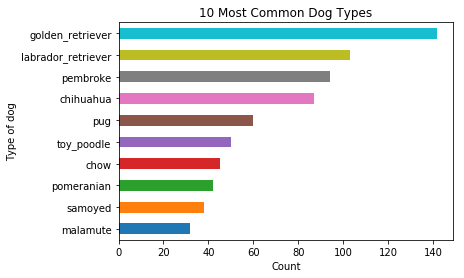

In [133]:
# Plot the 10 most common dog breeds in bar chart

df_twitter.dog_type.value_counts()[9::-1].plot(kind='barh')
plt.title('10 Most Common Dog Types')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

The 10 most common dog breeds are plotted in a bar chart. The most common dog breed in this dataset is the golden retriever with over 150 tweets. The next four most common breeds, in descending order, are the labrador retrieve, the pembroke (corgi), chihuahua, and the pug.

<a id='two'></a>
### Insight two & visualization

The most popular dog types in terms of the counts of favorites and retweets.

In [134]:
popular_dog_type = df_twitter[['dog_type','favorite_count','retweet_count']]
popular_dog_type.head()

,dog_type,favorite_count,retweet_count
0,NaN,37727.0,8223.0
1,chihuahua,32406.0,6079.0
2,chihuahua,24406.0,4023.0
3,labrador_retriever,41052.0,8369.0
4,basset,39243.0,9081.0


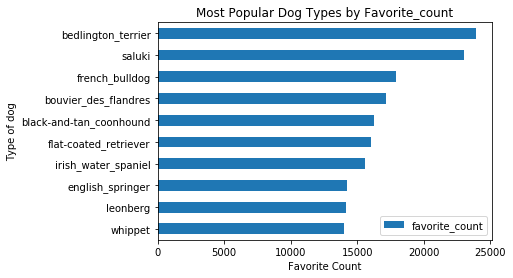

In [135]:
# Average and sort the favorite_count by dog_type
popular_dog_type_favorite = popular_dog_type[['dog_type','favorite_count']].groupby('dog_type').mean()
popular_dog_type_favorite = popular_dog_type_favorite.sort_values(by='favorite_count', ascending=False)[9::-1].plot(kind='barh')
plt.title('Most Popular Dog Types by Favorite_count')
plt.xlabel('Favorite Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');


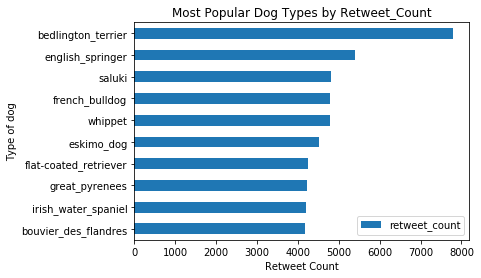

In [136]:
# Average and sort the retweet_count by dog_type
popular_dog_type_retweet = popular_dog_type[['dog_type','retweet_count']].groupby('dog_type').mean()
popular_dog_type_retweet = popular_dog_type_retweet.sort_values(by='retweet_count', ascending=False)[9::-1].plot(kind='barh')
plt.title('Most Popular Dog Types by Retweet_Count')
plt.xlabel('Retweet Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

We averaged the retweets and favorites for each breed and plotted the top 10 highest breeds for each factor. None of the top 10 most common dog types appears in these two plots. This suggests that the most common dog types on average didn't have the highest retweets or favorites. This might make sense as perhaps the most retweets and favorites are on less common breeds since they stick out. This relationship between common and popularity of dog breed could be interesting to investigate in the future.

Also we notice that most of the breeds appear in both graphs, except for the dog breeds leonberg and black-and-tan coonhound appearing in the favorite chart only and the dog breeds eskimo dog and great pyreness appearing in the retweet chart only. The highly consistent results between these two factors indicate that a positive relationship may exist between favorite_count and retweet_count. This will be discussed further in the following section - Insight three & Visualization.

We see that although most breeds appear in both charts, the bedlington terrier is consistently standing at the top of both charts, showing that this dog breed the most popular dog breed. It would be interesting to see how this differs with the different dog stages (pupper, floofer,  etc.)

For different dog stage, what are the most popular dog types.

### Doggo

In [144]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 19 columns):
tweet_id              2146 non-null int64
timestamp             2146 non-null object
text                  2146 non-null object
expanded_urls         2146 non-null object
rating_numerator      2146 non-null float64
rating_denominator    2146 non-null float64
name                  2146 non-null object
dog_stage             2146 non-null object
jpg_url               1624 non-null object
dog_type              1624 non-null object
confidence            1624 non-null float64
Unnamed: 0            2141 non-null float64
favorite_count        2141 non-null float64
retweet_count         2141 non-null float64
followers_count       2141 non-null float64
friends_count         2141 non-null float64
source                2141 non-null object
retweeted_status      2141 non-null object
url                   2141 non-null object
dtypes: float64(8), int64(1), object(10)
memory usage: 318.6+ KB


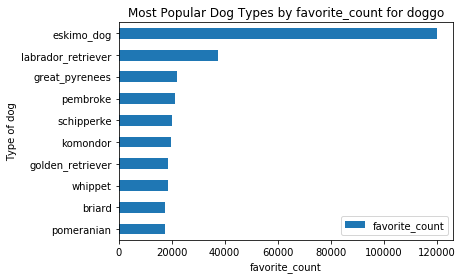

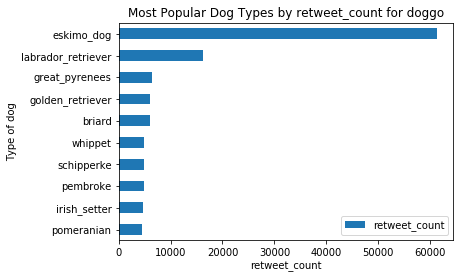

In [145]:
# Plot based on a particular dogs_stage and popular factor

def popular_type_on_stage(stage, popular_factor):
    df_type_stage = df_twitter[df_twitter.dog_stage == stage][['dog_type',popular_factor]].groupby('dog_type').mean()
    df_type_stage.sort_values(by=popular_factor, ascending=False)[9::-1].plot(kind='barh')
    plt.title('Most Popular Dog Types by {} for {}'.format(popular_factor,stage))
    plt.xlabel(popular_factor)
    plt.ylabel('Type of dog')
    plt.show

# Look at favorite count and retweet count plots
popular_type_on_stage("doggo", 'favorite_count')
popular_type_on_stage("doggo", 'retweet_count')

### Floofer

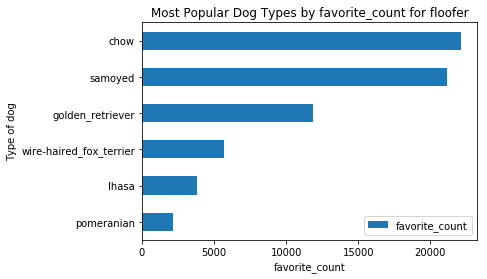

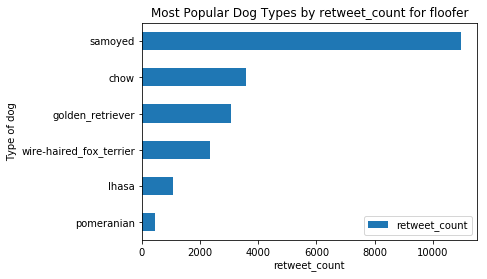

In [146]:
popular_type_on_stage("floofer", 'favorite_count')
popular_type_on_stage("floofer", 'retweet_count')

### Pupper

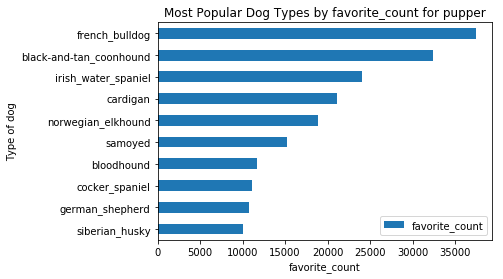

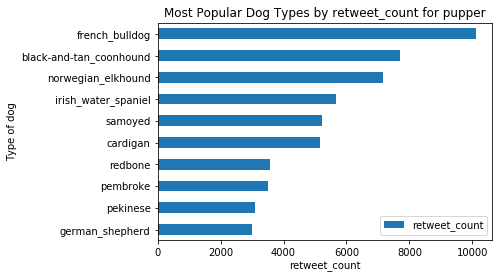

In [147]:
popular_type_on_stage("pupper", 'favorite_count')
popular_type_on_stage("pupper", 'retweet_count')

### Puppo

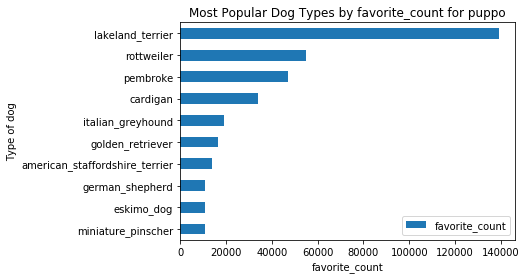

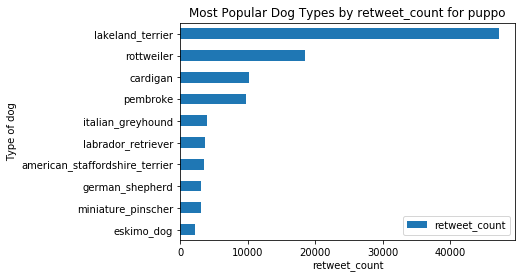

In [148]:
popular_type_on_stage("puppo", 'favorite_count')
popular_type_on_stage("puppo", 'retweet_count')

<a id='three'></a>
### Insight three & visualization

We are interesting to see how retweets relate to the number of favorites a tweet recieves. Does more favorites lead to more retweets? 

In [141]:
retweet_and_favorite = df_twitter[['retweet_count','favorite_count']]

In [142]:
retweet_and_favorite = retweet_and_favorite.query('retweet_count != "nan"')

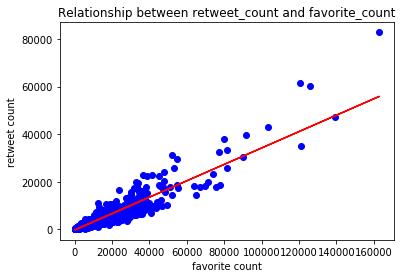

Line Equation: retweets = (0.3450123354827112)*favorites + -318.7377268044661
Correlation of line of best fit: 0.9273267975890243
0.3450123354827112 -318.7377268044661 0.9273267975890243 0.0 0.0030106567915791998


In [143]:
# Create linear line of best fit of all data points
y, x = retweet_and_favorite.retweet_count, retweet_and_favorite.favorite_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o',color='blue')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title('Relationship between retweet_count and favorite_count')
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.show()


print('Line Equation: retweets = ({})*favorites + {}'.format(slope,intercept))
print('Correlation of line of best fit: {}'.format(r_value))
print(slope, intercept, r_value, p_value, std_err)



A linear regression was run. The scatterplot of all tweets as well as a linear line of best are plotted. The high R-value and significant p-value reveal that the linear regression fit the data well. The scope value of 0.345 shows that favorite count is approximately three times as many as retweet_count. However, we notice that as the values get larger, the ratio of retweets to favorites get larger (further above the line of best fit).